In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import KFold, train_test_split, TimeSeriesSplit
import pickle
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("../data/processed/predictive_maintenance.csv")
df = df.set_index("UDI").drop(columns="Unnamed: 0")
first_column = df.pop('Target')
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'Target', first_column)

train, test = train_test_split(df, test_size=0.33, random_state=42)

to_model_columns= train.columns[1::]
X_train = train[to_model_columns]
Y_train = train.Target#.iloc[:,8].values
X_test = test[to_model_columns]
Y_test = test.Target

clf = SVC(gamma='auto')
clf.fit(X_train, Y_train)

SVC(gamma='auto')

In [35]:
# save the model to disk
filename = '../models/svm_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [36]:
Y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.9693939393939394


c:\Users\julie.ngan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


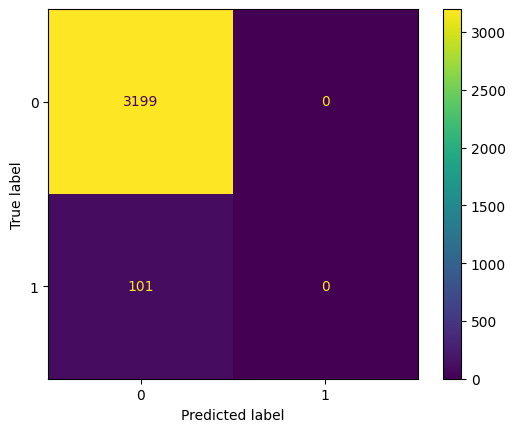

In [37]:
plot_confusion_matrix(clf, X_test, Y_test)  
plt.show()

In [9]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      2319
           1       0.41      0.03      0.06       981

    accuracy                           0.70      3300
   macro avg       0.56      0.51      0.44      3300
weighted avg       0.62      0.70      0.59      3300



Mean Accuracy

In [10]:
clf.score(X_test, Y_test)

0.6987878787878787

In [12]:
pd.set_option('display.max_columns', None)

test

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
UDI,,,,,,,,,,,,,,,
6253,300.8,310.3,1538,36.1,198,0,0,1,0,0,1,0,0,0,0
4685,303.6,311.8,1421,44.8,101,1,0,0,1,0,1,0,0,0,0
1732,298.3,307.9,1485,42.0,117,0,0,0,1,0,1,0,0,0,0
4743,303.3,311.3,1592,33.7,14,0,0,1,0,0,1,0,0,0,0
4522,302.4,310.4,1865,23.9,129,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,298.5,308.0,1461,51.9,157,0,0,0,1,0,1,0,0,0,0
9755,298.5,309.7,1552,34.0,205,0,0,0,1,0,1,0,0,0,0
6095,300.9,310.8,1402,48.1,22,0,0,0,1,0,1,0,0,0,0
